In [85]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pymysql
from sqlalchemy import create_engine


In [2]:
conn = psycopg2.connect(
    dbname="telecom",
    user="sarah",
    password="sarah",
    host="localhost",
    port="5432"
)

In [3]:
query = "SELECT * FROM xdr_data;"
data = pd.read_sql_query(query, conn)
conn.close()

/tmp/ipykernel_13940/3373734684.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, conn)


In [5]:
excel_data = pd.read_excel("../data/Week2_challenge_data_source.xlsx")
excel_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [6]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [8]:
data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [23]:
critical_cols = ['Bearer Id', 'MSISDN/Number', 'Total DL (Bytes)', 'Total UL (Bytes)']
for col in critical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

supplementary_cols = ['Avg RTT DL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)']
for col in supplementary_cols:
    data[col].fillna(data[col].median(), inplace=True)

categorical_cols = ['Handset Manufacturer', 'Handset Type', 'Last Location Name']
for col in categorical_cols:
    data[col].fillna('Unknown', inplace=True)

threshold = 0.5 * len(data)
data.dropna(thresh=threshold, axis=1, inplace=True)

/tmp/ipykernel_13940/1709902353.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
/tmp/ipykernel_13940/1709902353.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [24]:
data.isnull().sum()

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                         0
IMEI                                572
Last Location Name                    0
Avg RTT DL (ms)                       0
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
TCP DL Retrans. Vol (Bytes)           0
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
HTTP DL (Bytes)                       0
Activity Duration DL (ms)             1


In [35]:
cols_with_small_missing = ['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1']
for col in cols_with_small_missing:
    data[col].dropna(inplace=True)

data['IMSI'].fillna('Unknown', inplace=True)
data['IMEI'].fillna('Unknown', inplace=True)

cols_with_large_missing = ['Avg RTT UL (ms)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 
                           'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 
                           'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B']
for col in cols_with_large_missing:
    data[col].fillna(data[col].median(), inplace=True)

/tmp/ipykernel_13940/1585671342.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['IMSI'].fillna('Unknown', inplace=True)
/tmp/ipykernel_13940/1585671342.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['IMSI'].fillna('Unknown', inplace=True)
/tmp/ipykernel_13940/1585671342.py:6: FutureWarning: A value is trying to be set on a copy 

In [45]:
data.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
TCP DL Retrans. Vol (Bytes)       0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
HTTP DL (Bytes)                   0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer        

In [44]:
data.dropna(inplace=True)

In [49]:
top_10_handsets = data['Handset Type'].value_counts().head(10)
top_10_handsets

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

In [50]:
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
top_3_manufacturers

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

In [51]:
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_handsets_per_manufacturer[manufacturer] = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"{manufacturer}:")
    print(handsets)

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [52]:
# Group by user and calculate metrics
user_behavior = data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',                      # Number of xDR sessions
    'Dur. (ms)': 'sum',                        # Total session duration
    'Total DL (Bytes)': 'sum',                 # Total Download data
    'Total UL (Bytes)': 'sum',                 # Total Upload data
    'Social Media DL (Bytes)': 'sum',          # Social Media Download
    'Social Media UL (Bytes)': 'sum',          # Social Media Upload
    'Google DL (Bytes)': 'sum',                # Google Download
    'Google UL (Bytes)': 'sum',                # Google Upload
    'Email DL (Bytes)': 'sum',                 # Email Download
    'Email UL (Bytes)': 'sum',                 # Email Upload
    'Youtube DL (Bytes)': 'sum',               # YouTube Download
    'Youtube UL (Bytes)': 'sum',               # YouTube Upload
    'Netflix DL (Bytes)': 'sum',               # Netflix Download
    'Netflix UL (Bytes)': 'sum',               # Netflix Upload
    'Gaming DL (Bytes)': 'sum',                # Gaming Download
    'Gaming UL (Bytes)': 'sum',                # Gaming Upload,
}).reset_index()

# Add total data volume column
user_behavior['Total Volume (Bytes)'] = user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)']

print("Aggregated User Behavior:")
print(user_behavior.head())

Aggregated User Behavior:
   MSISDN/Number  Bearer Id  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
0   3.360100e+10          1   116720.0      8.426375e+08        36053108.0   
1   3.360100e+10          1   181230.0      1.207552e+08        36104459.0   
2   3.360100e+10          1   134969.0      5.566597e+08        39306820.0   
3   3.360101e+10          1    49878.0      4.019932e+08        20327526.0   
4   3.360101e+10          2    37104.0      1.363130e+09        94280527.0   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                2206504.0                  25631.0          3337123.0   
1                2598548.0                  62017.0          4197697.0   
2                3148004.0                  47619.0          3343483.0   
3                 251469.0                  28825.0          5937765.0   
4                2861230.0                  51312.0         13728668.0   

   Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Yo

In [53]:
# Segment users into deciles based on total duration
user_behavior['Duration Decile'] = pd.qcut(user_behavior['Dur. (ms)'], q=10, labels=False)

# Compute total data (DL + UL) per decile
decile_data = user_behavior.groupby('Duration Decile').agg({
    'Total Volume (Bytes)': 'sum',
    'Dur. (ms)': 'mean'
}).reset_index()

print("Decile Data:")
print(decile_data)

Decile Data:
   Duration Decile  Total Volume (Bytes)      Dur. (ms)
0                0          5.439277e+12   20072.819704
1                1          6.109410e+12   40229.016192
2                2          6.536402e+12   71145.599497
3                3          6.034241e+12   86368.788611
4                4          5.144182e+12   94271.087423
5                5          6.425801e+12  117432.523538
6                6          6.152478e+12  147783.117350
7                7          7.822234e+12  174939.103874
8                8          9.306258e+12  232732.436781
9                9          1.539441e+13  484625.140932


In [54]:
# Compute basic metrics for relevant columns
basic_metrics = user_behavior[['Dur. (ms)', 'Total Volume (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)']].agg(['mean', 'median', 'std', 'min', 'max'])

print("Basic Metrics:")
print(basic_metrics)

Basic Metrics:
           Dur. (ms)  Total Volume (Bytes)  Total DL (Bytes)  Total UL (Bytes)
mean    1.468438e+05          6.959272e+08      6.382035e+08      5.772370e+07
median  1.027410e+05          6.179232e+08      5.703713e+08      4.679434e+07
std     2.892198e+05          1.695706e+09      1.558474e+09      1.400375e+08
min     7.142000e+03          3.324901e+07      8.827082e+06      2.866892e+06
max     7.244640e+07          5.312489e+11      4.869236e+11      4.432530e+10


In [55]:
# Dispersion parameters for quantitative variables
dispersion_metrics = user_behavior[['Dur. (ms)', 'Total Volume (Bytes)', 'Total DL (Bytes)', 'Total UL (Bytes)']].agg(['var', 'skew', 'kurtosis'])

print("Dispersion Metrics:")
print(dispersion_metrics)

Dispersion Metrics:
             Dur. (ms)  Total Volume (Bytes)  Total DL (Bytes)  \
var       8.364809e+10          2.875418e+18      2.428841e+18   
skew      1.516867e+02          2.866991e+02      2.843610e+02   
kurtosis  3.675818e+04          8.968597e+04      8.871113e+04   

          Total UL (Bytes)  
var           1.961050e+16  
skew          2.956670e+02  
kurtosis      9.344964e+04  


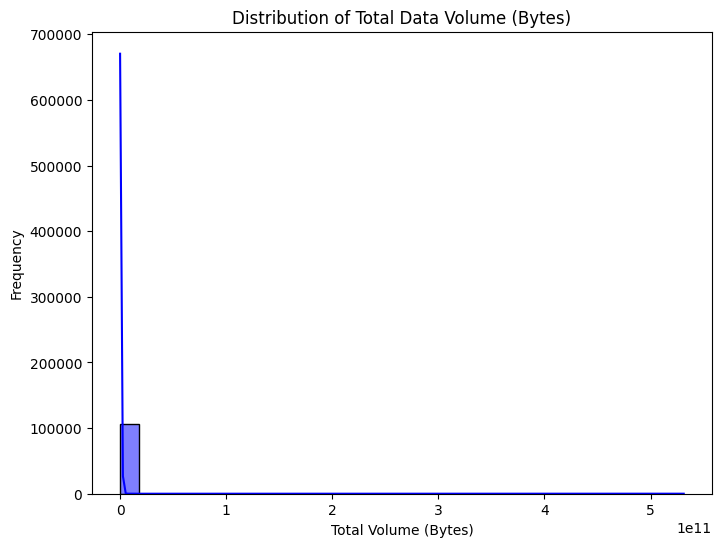

In [56]:
# Plot histograms for total data volume
plt.figure(figsize=(8, 6))
sns.histplot(user_behavior['Total Volume (Bytes)'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Data Volume (Bytes)')
plt.xlabel('Total Volume (Bytes)')
plt.ylabel('Frequency')
plt.show()

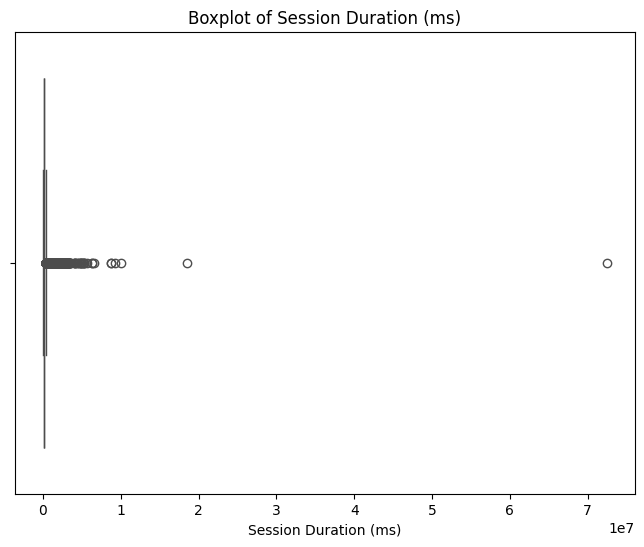

In [57]:
# Boxplot for session duration
plt.figure(figsize=(8, 6))
sns.boxplot(x=user_behavior['Dur. (ms)'], color='orange')
plt.title('Boxplot of Session Duration (ms)')
plt.xlabel('Session Duration (ms)')
plt.show()

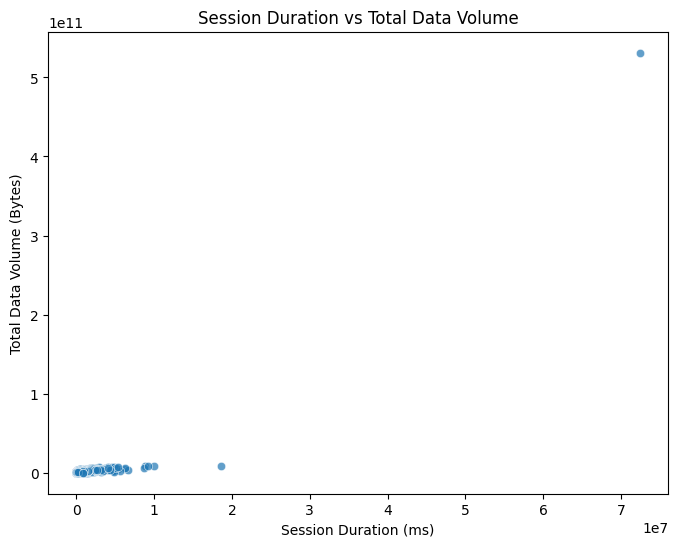

In [58]:
# Relationship between total data volume and session duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x=user_behavior['Dur. (ms)'], y=user_behavior['Total Volume (Bytes)'], alpha=0.7)
plt.title('Session Duration vs Total Data Volume')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Total Data Volume (Bytes)')
plt.show()

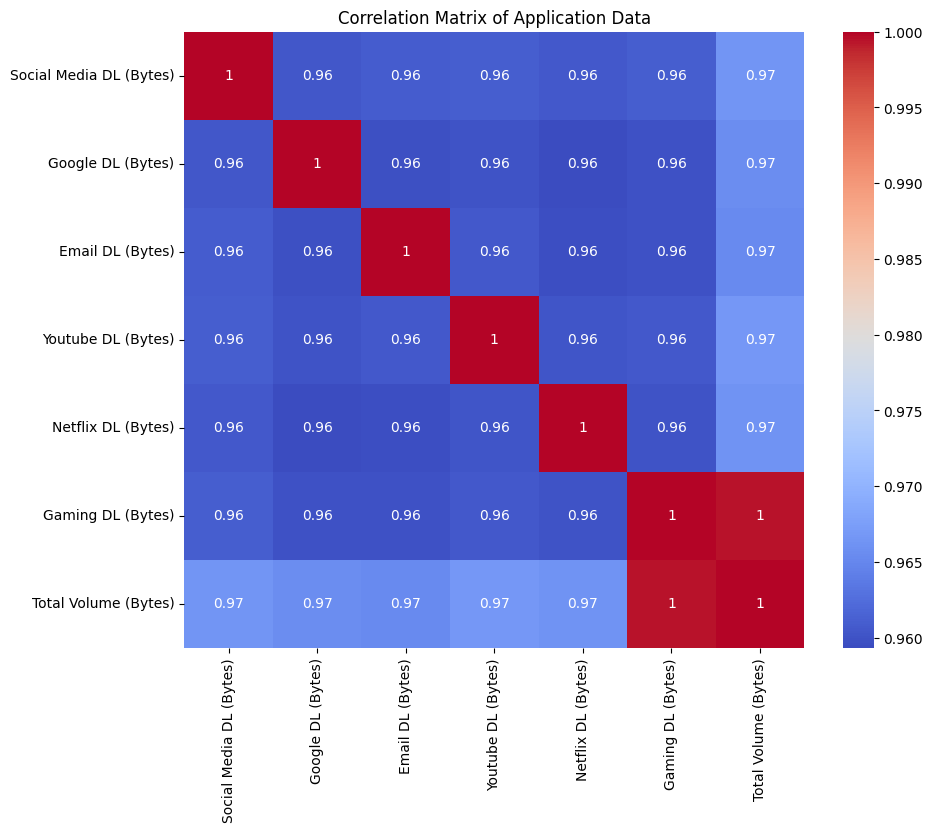

In [59]:
# Correlation matrix for application data
app_data_cols = [
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
    'Total Volume (Bytes)'
]
correlation_matrix = user_behavior[app_data_cols].corr()

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Application Data')
plt.show()

Explained Variance Ratio: [0.96872203 0.00853629]


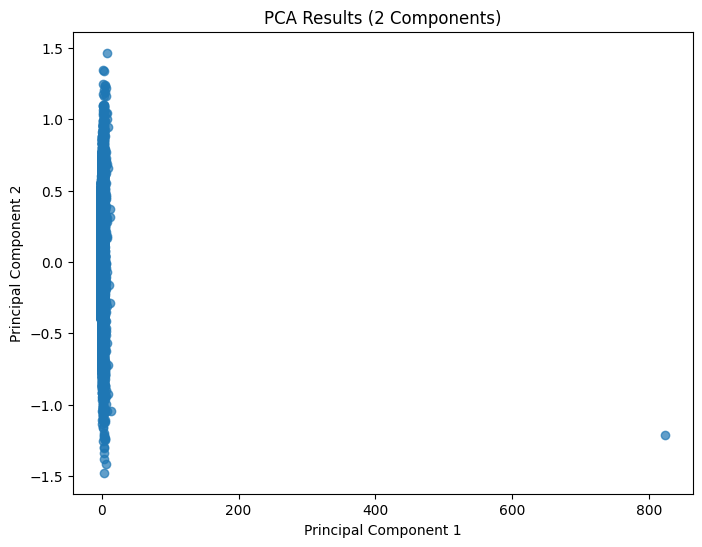

In [60]:
# Select relevant features for PCA
pca_features = user_behavior[app_data_cols].dropna()

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_features)

# Apply PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio:", explained_variance)

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.7)
plt.title('PCA Results (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [62]:
# Aggregate metrics per customer ID (MSISDN)
engagement_metrics = user_behavior.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',                      # Sessions frequency
    'Dur. (ms)': 'sum',                        # Total session duration
    'Total Volume (Bytes)': 'sum'              # Total traffic (DL + UL)
}).rename(columns={
    'Bearer Id': 'Sessions Frequency',
    'Dur. (ms)': 'Total Duration (ms)',
    'Total Volume (Bytes)': 'Total Traffic (Bytes)'
}).reset_index()

# Top 10 customers per engagement metric
top_sessions = engagement_metrics.nlargest(10, 'Sessions Frequency')
top_duration = engagement_metrics.nlargest(10, 'Total Duration (ms)')
top_traffic = engagement_metrics.nlargest(10, 'Total Traffic (Bytes)')

print("Top 10 Customers by Sessions Frequency:")
print(top_sessions)

print("\nTop 10 Customers by Total Duration:")
print(top_duration)

print("\nTop 10 Customers by Total Traffic:")
print(top_traffic)

Top 10 Customers by Sessions Frequency:
   MSISDN/Number  Sessions Frequency  Total Duration (ms)  \
0   3.360100e+10                   1             116720.0   
1   3.360100e+10                   1             181230.0   
2   3.360100e+10                   1             134969.0   
3   3.360101e+10                   1              49878.0   
4   3.360101e+10                   1              37104.0   
5   3.360101e+10                   1             253983.0   
6   3.360101e+10                   1             128360.0   
7   3.360101e+10                   1              86399.0   
8   3.360101e+10                   1             495702.0   
9   3.360102e+10                   1             124854.0   

   Total Traffic (Bytes)  
0           8.786906e+08  
1           1.568596e+08  
2           5.959665e+08  
3           4.223207e+08  
4           1.457411e+09  
5           6.152172e+08  
6           6.547231e+08  
7           3.326604e+08  
8           9.901322e+08  
9           7.3246

In [64]:
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['Sessions Frequency', 'Total Duration (ms)', 'Total Traffic (Bytes)']])

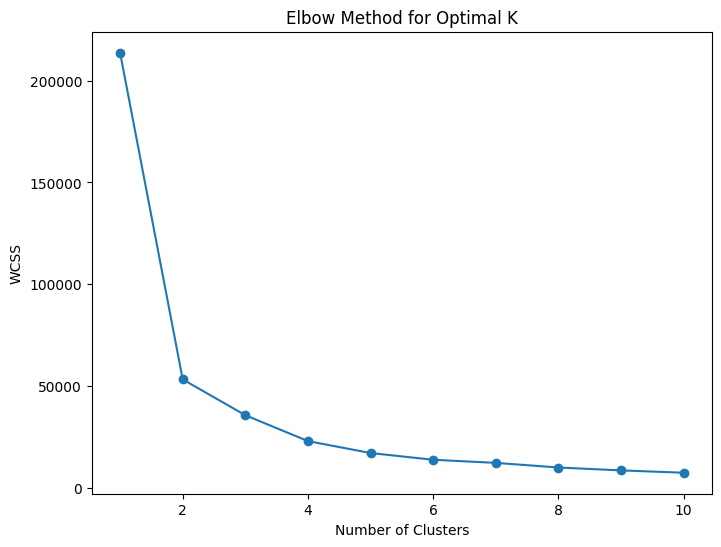

In [65]:
# Elbow method
wcss = []  # Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [66]:
# Fit K-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)

# Compute cluster statistics
cluster_stats = engagement_metrics.groupby('Cluster').agg({
    'Sessions Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

print("Cluster Statistics:")
print(cluster_stats)

Cluster Statistics:
        Sessions Frequency                  Total Duration (ms)              \
                       min max mean     sum                 min         max   
Cluster                                                                       
0                        1   1  1.0  105990              7142.0    811422.0   
1                        1   1  1.0       1          72446396.0  72446396.0   
2                        1   1  1.0     866            733150.0  18553754.0   

                                    Total Traffic (Bytes)                \
                 mean           sum                   min           max   
Cluster                                                                   
0        1.358107e+05  1.439457e+10          3.324901e+07  4.771967e+09   
1        7.244640e+07  7.244640e+07          5.312489e+11  5.312489e+11   
2        1.413700e+06  1.224264e+09          9.705338e+07  8.846226e+09   

                                     
                

In [68]:
# Aggregate traffic per application
application_columns = [
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)'
]
application_traffic = user_behavior.groupby('MSISDN/Number')[application_columns].sum()

# Find top 10 users for each application
top_users_per_app = {app: application_traffic.nlargest(10, app) for app in application_columns}

print("Top 10 Users Per Application:")
for app, users in top_users_per_app.items():
    print(f"\n{app}:")
    print(users)

Top 10 Users Per Application:

Social Media DL (Bytes):
               Social Media DL (Bytes)  Google DL (Bytes)  Email DL (Bytes)  \
MSISDN/Number                                                                 
4.188282e+10              1.935920e+09       6.002192e+09      1.902256e+09   
3.362632e+10              4.274384e+07       1.161065e+08      3.340478e+07   
3.376054e+10              3.929765e+07       8.862653e+07      2.643790e+07   
3.365973e+10              3.490044e+07       9.095855e+07      2.990765e+07   
3.361489e+10              2.774974e+07       9.394171e+07      3.360721e+07   
3.362578e+10              2.656412e+07       1.079047e+08      3.189541e+07   
3.366716e+10              2.375375e+07       7.170783e+07      2.327675e+07   
3.378632e+10              2.356866e+07       7.881981e+07      3.087691e+07   
3.366907e+10              2.347705e+07       5.491522e+07      1.781358e+07   
3.360313e+10              2.277668e+07       7.394206e+07      2.034373e+07

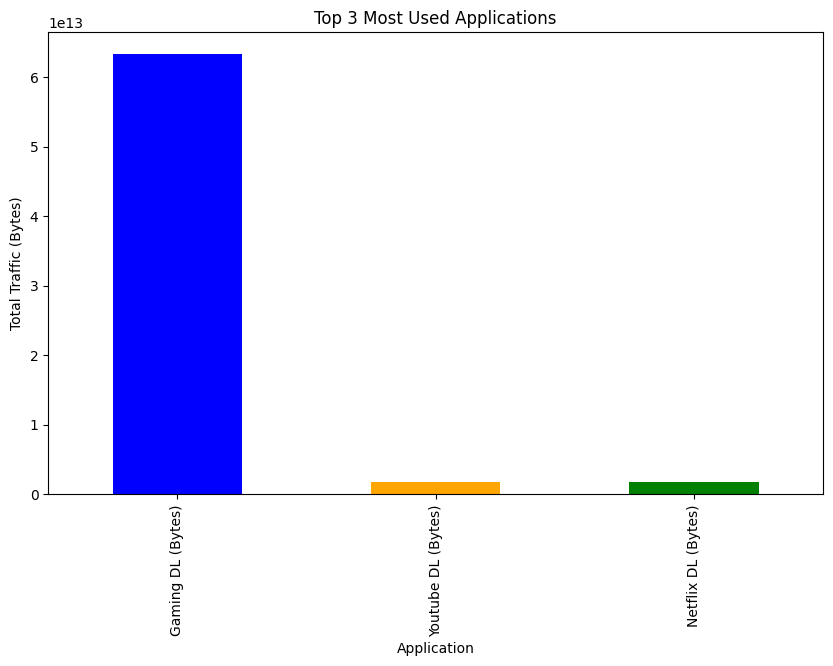

In [69]:
# Calculate total traffic for each application
total_app_traffic = application_traffic.sum().sort_values(ascending=False)

# Top 3 most used applications
top_3_apps = total_app_traffic.head(3).index

# Plot top 3 applications
plt.figure(figsize=(10, 6))
total_app_traffic[top_3_apps].plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Top 3 Most Used Applications')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Application')
plt.show()

In [71]:
total_app_traffic

Gaming DL (Bytes)          6.330671e+13
Youtube DL (Bytes)         1.745111e+12
Netflix DL (Bytes)         1.744028e+12
Google DL (Bytes)          8.626129e+11
Social Media DL (Bytes)    2.692983e+11
Email DL (Bytes)           2.687593e+11
dtype: float64

In [73]:
# Fit K-means with optimal k
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
engagement_metrics['Optimal Cluster'] = kmeans_optimal.fit_predict(normalized_metrics)

# Cluster statistics for the optimal clustering
optimal_cluster_stats = engagement_metrics.groupby('Optimal Cluster').agg({
    'Sessions Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

print("Optimal Cluster Statistics:")
print(optimal_cluster_stats)

Optimal Cluster Statistics:
                Sessions Frequency                 Total Duration (ms)  \
                               min max mean    sum                 min   
Optimal Cluster                                                          
0                                1   1  1.0  93039              7142.0   
1                                1   1  1.0      1          72446396.0   
2                                1   1  1.0    273           1322251.0   
3                                1   1  1.0  13544             89973.0   

                                                        Total Traffic (Bytes)  \
                        max          mean           sum                   min   
Optimal Cluster                                                                 
0                  318382.0  1.047362e+05  9.744555e+09          3.324901e+07   
1                72446396.0  7.244640e+07  7.244640e+07          5.312489e+11   
2                18553754.0  2.346854e+06  6.406

In [75]:
# Aggregate metrics per customer
experience_metrics = data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',  # Average TCP retransmission
    'Avg RTT DL (ms)': 'mean',              # Average RTT
    'Avg RTT UL (ms)': 'mean',
    'Avg Bearer TP DL (kbps)': 'mean',      # Average throughput
    'Avg Bearer TP UL (kbps)': 'mean',
    'Handset Type': lambda x: x.mode()[0]   # Most frequent handset type
}).reset_index()

# Combine retransmission values
experience_metrics['Avg TCP Retransmission (Bytes)'] = (
    experience_metrics['TCP DL Retrans. Vol (Bytes)']
)

# Combine RTT values
experience_metrics['Avg RTT (ms)'] = (
    experience_metrics['Avg RTT DL (ms)'] +
    experience_metrics['Avg RTT UL (ms)']
) / 2

# Combine throughput values
experience_metrics['Avg Throughput (kbps)'] = (
    experience_metrics['Avg Bearer TP DL (kbps)'] +
    experience_metrics['Avg Bearer TP UL (kbps)']
) / 2

# Drop intermediate columns
experience_metrics = experience_metrics[[
    'MSISDN/Number', 'Avg TCP Retransmission (Bytes)', 
    'Avg RTT (ms)', 'Avg Throughput (kbps)', 'Handset Type'
]]

# Handle missing values (replace with mean or mode)
experience_metrics.fillna({
    'Avg TCP Retransmission (Bytes)': experience_metrics['Avg TCP Retransmission (Bytes)'].mean(),
    'Avg RTT (ms)': experience_metrics['Avg RTT (ms)'].mean(),
    'Avg Throughput (kbps)': experience_metrics['Avg Throughput (kbps)'].mean(),
}, inplace=True)

print("Aggregated User Experience Metrics:")
print(experience_metrics.head())

Aggregated User Experience Metrics:
   MSISDN/Number  Avg TCP Retransmission (Bytes)  Avg RTT (ms)  \
0   3.360100e+10                        568730.0         23.00   
1   3.360100e+10                        568730.0         15.50   
2   3.360100e+10                        568730.0         25.00   
3   3.360101e+10                          1066.0         42.00   
4   3.360101e+10                       4959180.0         29.75   

   Avg Throughput (kbps)                    Handset Type  
0                   38.0  Huawei P20 Lite Huawei Nova 3E  
1                   49.5          Apple iPhone 7 (A1778)  
2                   48.5                       undefined  
3                  124.0         Apple iPhone 5S (A1457)  
4                14211.0         Apple iPhone Se (A1723)  


In [76]:
# Define functions to compute top, bottom, and most frequent values
def compute_values(column):
    top_values = column.nlargest(10)
    bottom_values = column.nsmallest(10)
    most_frequent = column.value_counts().head(10)
    return top_values, bottom_values, most_frequent

# Compute for TCP Retransmission
tcp_top, tcp_bottom, tcp_freq = compute_values(data['TCP DL Retrans. Vol (Bytes)'])

# Compute for RTT
rtt_top, rtt_bottom, rtt_freq = compute_values(data['Avg RTT DL (ms)'])

# Compute for Throughput
tp_top, tp_bottom, tp_freq = compute_values(data['Avg Bearer TP DL (kbps)'])

print("Top 10 TCP Retransmission Values:")
print(tcp_top)

print("\nBottom 10 TCP Retransmission Values:")
print(tcp_bottom)

print("\nMost Frequent TCP Retransmission Values:")
print(tcp_freq)

print("\nTop 10 RTT Values:")
print(rtt_top)

print("\nBottom 10 RTT Values:")
print(rtt_bottom)

print("\nMost Frequent RTT Values:")
print(rtt_freq)

print("\nTop 10 Throughput Values:")
print(tp_top)

print("\nBottom 10 Throughput Values:")
print(tp_bottom)

print("\nMost Frequent Throughput Values:")
print(tp_freq)

Top 10 TCP Retransmission Values:
77979     4.294426e+09
135678    4.291380e+09
34645     4.289877e+09
140813    4.289488e+09
3782      4.288060e+09
119684    4.275259e+09
39637     4.268432e+09
76990     4.259997e+09
59016     4.256650e+09
41209     4.254644e+09
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Bottom 10 TCP Retransmission Values:
59717     2.0
125094    2.0
2850      4.0
39610     4.0
52488     4.0
60376     4.0
60426     4.0
75093     4.0
100314    4.0
143429    4.0
Name: TCP DL Retrans. Vol (Bytes), dtype: float64

Most Frequent TCP Retransmission Values:
TCP DL Retrans. Vol (Bytes)
568730.0    88146
1330.0        433
2660.0        219
38.0          200
92.0          192
1318.0        156
543.0         133
3990.0        114
76.0          108
5320.0        102
Name: count, dtype: int64

Top 10 RTT Values:
30166     96923.0
29927     64640.0
17910     55811.0
5989      54847.0
22851     26971.0
23455     26250.0
1373      25873.0
81274     25602.0
97321     25374.0


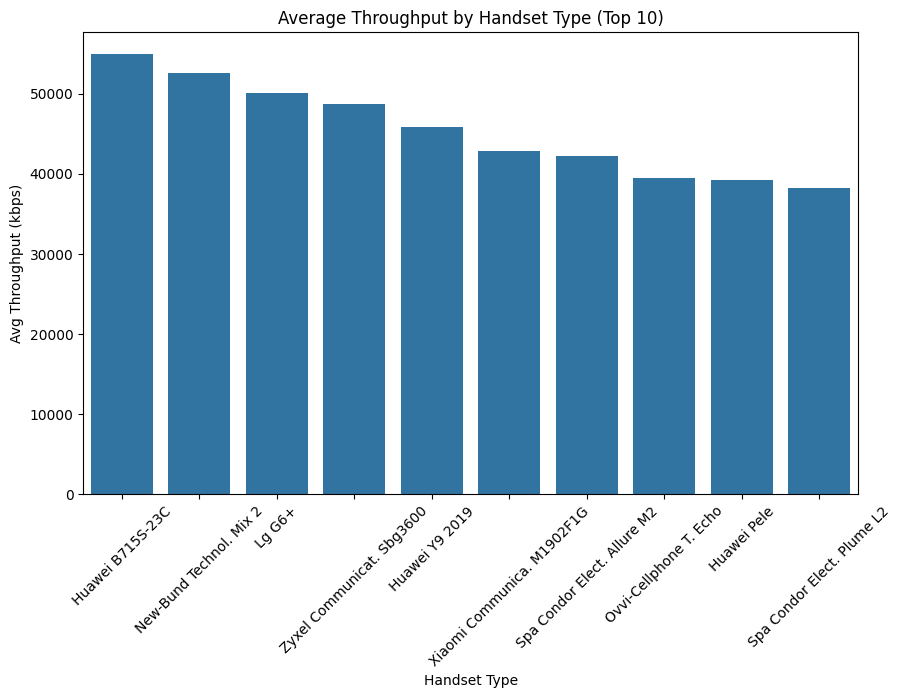

In [77]:
# Average throughput per handset type
throughput_by_handset = experience_metrics.groupby('Handset Type')['Avg Throughput (kbps)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=throughput_by_handset.head(10).index, y=throughput_by_handset.head(10).values)
plt.title('Average Throughput by Handset Type (Top 10)')
plt.xlabel('Handset Type')
plt.ylabel('Avg Throughput (kbps)')
plt.xticks(rotation=45)
plt.show()

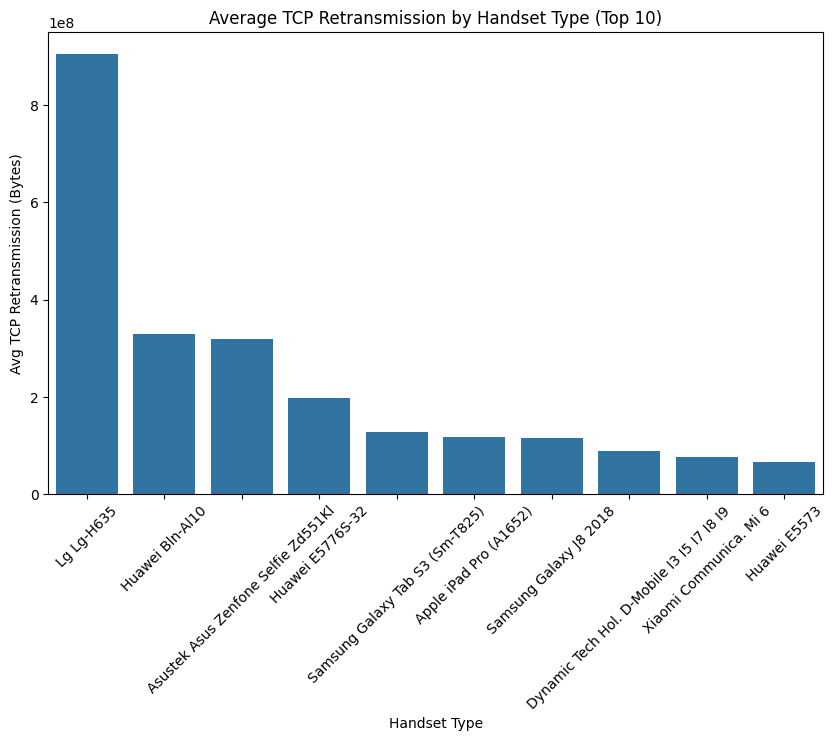

In [78]:
# Average TCP retransmission per handset type
tcp_by_handset = experience_metrics.groupby('Handset Type')['Avg TCP Retransmission (Bytes)'].mean().sort_values(ascending=False)

# Plot distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=tcp_by_handset.head(10).index, y=tcp_by_handset.head(10).values)
plt.title('Average TCP Retransmission by Handset Type (Top 10)')
plt.xlabel('Handset Type')
plt.ylabel('Avg TCP Retransmission (Bytes)')
plt.xticks(rotation=45)
plt.show()

In [83]:
tcp_by_handset.head(10)

Handset Type
Lg Lg-H635                                   9.050423e+08
Huawei Bln-Al10                              3.290646e+08
Asustek Asus Zenfone Selfie Zd551Kl          3.189534e+08
Huawei E5776S-32                             1.979341e+08
Samsung Galaxy Tab S3 (Sm-T825)              1.268012e+08
Apple iPad Pro (A1652)                       1.173119e+08
Samsung Galaxy J8 2018                       1.157526e+08
Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9    8.946030e+07
Xiaomi Communica. Mi 6                       7.515213e+07
Huawei E5573                                 6.584263e+07
Name: Avg TCP Retransmission (Bytes), dtype: float64

In [79]:
# Normalize relevant metrics
features = experience_metrics[['Avg TCP Retransmission (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']]
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
experience_metrics['Cluster'] = kmeans.fit_predict(normalized_features)

# Cluster Descriptions
cluster_stats = experience_metrics.groupby('Cluster').agg({
    'Avg TCP Retransmission (Bytes)': ['mean', 'min', 'max'],
    'Avg RTT (ms)': ['mean', 'min', 'max'],
    'Avg Throughput (kbps)': ['mean', 'min', 'max']
})

print("Cluster Statistics:")
print(cluster_stats)

Cluster Statistics:
        Avg TCP Retransmission (Bytes)                              \
                                  mean           min           max   
Cluster                                                              
0                         1.517691e+06  2.000000e+00  6.898160e+08   
1                         1.814501e+07  3.100000e+01  1.118069e+09   
2                         2.224267e+09  1.131088e+09  4.289488e+09   

        Avg RTT (ms)                  Avg Throughput (kbps)           \
                mean    min       max                  mean      min   
Cluster                                                                
0          61.492681   0.00  48462.00           2163.801274      0.0   
1          51.031649   8.75   4148.25          27551.162049  10313.5   
2          71.895964  26.00    286.00          35717.113050   7995.0   

                    
               max  
Cluster             
0         15008.50  
1        141965.50  
2         86154.75  


In [86]:
# Compute the less engaged cluster center from the engagement clustering
less_engaged_cluster_center = kmeans.cluster_centers_[0]  # Assuming cluster 0 is less engaged

# Calculate engagement score as Euclidean distance to the less engaged cluster center
engagement_scores = euclidean_distances(
    normalized_metrics,
    less_engaged_cluster_center.reshape(1, -1)
).flatten()

experience_metrics['Engagement Score'] = engagement_scores

In [87]:
# Compute the worst experience cluster center from the experience clustering
worst_experience_cluster_center = kmeans.cluster_centers_[
    np.argmax([cluster_stats['Avg RTT (ms)']['mean'][i] for i in range(3)])
]  # Cluster with the highest RTT

# Calculate experience score as Euclidean distance to the worst experience cluster center
experience_features = experience_metrics[['Avg TCP Retransmission (Bytes)', 'Avg RTT (ms)', 'Avg Throughput (kbps)']]
experience_normalized = scaler.fit_transform(experience_features)
experience_scores = euclidean_distances(
    experience_normalized,
    worst_experience_cluster_center.reshape(1, -1)
).flatten()

experience_metrics['Experience Score'] = experience_scores

In [88]:
# Calculate satisfaction score
experience_metrics['Satisfaction Score'] = (
    experience_metrics['Engagement Score'] + experience_metrics['Experience Score']
) / 2

# Top 10 satisfied customers
top_satisfied_customers = experience_metrics.nlargest(10, 'Satisfaction Score')

print("Top 10 Satisfied Customers:")
print(top_satisfied_customers[['MSISDN/Number', 'Satisfaction Score']])

Top 10 Satisfied Customers:
        MSISDN/Number  Satisfaction Score
106853   4.188282e+10          211.727369
47983    3.366232e+10           83.562387
80249    3.368369e+10           48.382351
13180    3.362578e+10           43.313259
41944    3.366087e+10           30.146554
6437     3.361489e+10           28.540152
92923    3.376054e+10           27.366820
13526    3.362632e+10           26.535557
65118    3.366716e+10           26.325623
93844    3.376094e+10           26.088549


In [89]:
# Define predictors and target
X = experience_metrics[['Engagement Score', 'Experience Score']]
y = experience_metrics['Satisfaction Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Mean Squared Error: {mse}")
print(f"Model R^2 Score: {r2}")


Model Mean Squared Error: 3.808181542255071e-30
Model R^2 Score: 1.0


In [90]:
# Fit K-Means clustering
eng_exp_scores = experience_metrics[['Engagement Score', 'Experience Score']]
kmeans_eng_exp = KMeans(n_clusters=2, random_state=42)
experience_metrics['Satisfaction Cluster'] = kmeans_eng_exp.fit_predict(eng_exp_scores)

# Cluster centers
print("Cluster Centers (Engagement and Experience Scores):")
print(kmeans_eng_exp.cluster_centers_)

Cluster Centers (Engagement and Experience Scores):
[[  0.54097812  22.76275007]
 [400.77811006  22.67662787]]


In [91]:
# Aggregate average satisfaction and experience scores per cluster
cluster_aggregates = experience_metrics.groupby('Satisfaction Cluster').agg({
    'Engagement Score': 'mean',
    'Experience Score': 'mean',
    'Satisfaction Score': 'mean'
}).reset_index()

print("Cluster Aggregates:")
print(cluster_aggregates)

Cluster Aggregates:
   Satisfaction Cluster  Engagement Score  Experience Score  \
0                     0          0.540978         22.762750   
1                     1        400.778110         22.676628   

   Satisfaction Score  
0           11.651864  
1          211.727369  


In [104]:
# Define MySQL connection parameters
mysql_host = "localhost"
mysql_user = "sarah"
mysql_password = "sarah"
mysql_db = "telecom_db"

# Create connection engine
engine = create_engine(f"mysql+pymysql://{mysql_user}:{mysql_password}@{mysql_host}/{mysql_db}")

# Export data to MySQL
experience_metrics.to_sql('satisfaction_analysis', con=engine, if_exists='replace', index=False)

106857